#### 简要的理论：关于KMeans Clustering
- K代表要聚类到几个簇，自定义或通过一些方法选择K
- 初始化：质心（聚类中心）：随机初始化
- 迭代：
    - 计算数据点到质心的距离，将点划分到最接近的质心簇中
    - 利用分配好的数据点来获取新的质心：簇中所有点的平均位置
- 不断迭代直到达到最大迭代次数或质心不再改变


#### Note: These codes aim to implement the KMeans algorithm without the help of any machine learning related library such as scikit-learn.
> 注意：这些代码旨在不借助任何机器学习相关的库（如scikit-learn）实现KMeans算法

In [1]:
# 主要使用numpy和基本的python,matplotlib用于可视化
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeansClustering:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    # 计算欧式距离的方法
    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))
    
    # 拟合：X是输入的聚类数据
    def fit(self, X, max_iterations=200):
        # 随即初始化聚类中心：在数据的边界内随机选择质心
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), 
                                            size=(self.k, X.shape[1]))
        # 迭代
        for _ in range(max_iterations):
            # 簇的标签
            y = []
            
            # 计算每个数据点到所有质心的欧式距离
            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                # 返回最小距离对应点的索引作为簇的标签
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)

            # 簇中数据点的索引
            cluster_indices = []
            #将数据集中被分配到每个簇的数据点的索引进行收集
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            # 新的聚类中心
            cluster_centers = []

            # 计算新的聚类中心
            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])

            # 设置聚类中心更新的差异阈值
            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)

        return y


In [3]:

random_points = np.random.randint(0, 100, (100, 2))

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)


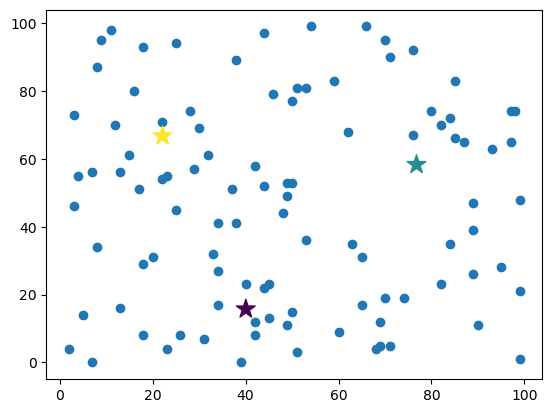

In [4]:
plt.scatter(random_points[:,0], random_points[:,1])
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c=range(len(kmeans.centroids)), marker="*", s=200)

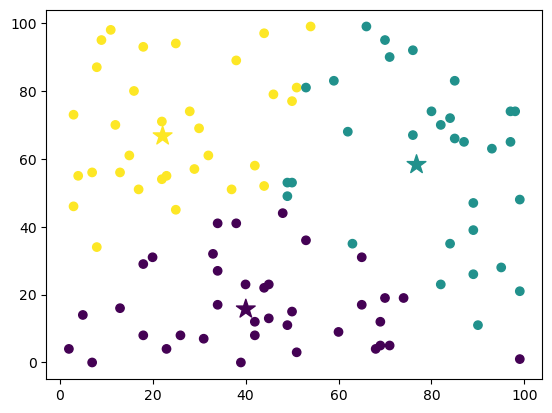

In [5]:

plt.scatter(random_points[:,0], random_points[:,1], c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c=range(len(kmeans.centroids)), marker="*", s=200)

In [6]:
from PIL import Image

# 读取图片
image = Image.open("./images/flower_cat.jpg")


In [7]:

# 将图片转换为NumPy数组
image_array = np.array(image)

# 获取图片的形状
height, width, channels = image_array.shape


In [8]:

# 将三维数组转换为二维数组，每一行代表一个像素点的颜色信息
X = image_array.reshape(-1, channels)

# 聚类的数量（簇的数量）
k = 2

# 使用自定义的KMeansClustering类（或者使用sklearn的KMeans类）进行颜色聚类
kmeans = KMeansClustering(k=k)
cluster_labels = kmeans.fit(X)

# 将聚类结果重新转换为图片的形状
clustered_image_array = cluster_labels.reshape(height, width)


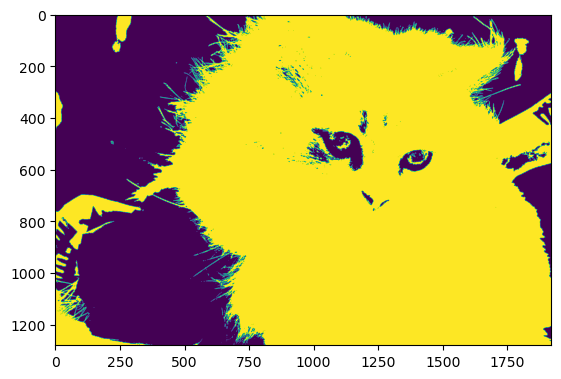

In [9]:

# 创建一个新的图片对象，显示聚类结果
clustered_image = Image.fromarray(np.uint8(clustered_image_array))
plt.imshow(clustered_image)
# plt.axis('off')  # 不显示坐标轴
plt.show()


### 可见自己实现的聚类算法在图像颜色聚类的效果在性能和使用上存在一些劣势，可通过对初始聚类中心的随机选择方法进行优化来提升对应的性能和效果。